### Libraries

In [97]:
import pandas as pd#data structures and operations for manipulating numerical tables and time series.
import pandas_datareader.data as data#Up-to-date remote data access for pandas.
import datetime as dt#supplies classes for manipulating dates and times
import matplotlib.pyplot as plt#plotting library for the Python.
import seaborn as sns;# visualizacion
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore') # We can suppress the warnings
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
from itertools import product

In [2]:
#!pip install pandas-datareader
#!pip install seaborn
#!conda install -c plotly plotly

### Contents

### I.- Describe Data :

#### 1.- EDP Renováveis (EDPR.LS)

In [3]:
# We define the ticket from the companies that we are interested in research.

tickers = ['EDPR.LS','VWS.CO']

# We would like all available data from 01-01-2016 until 30/11/2021
start_date = '2016-01-01'
end_date = '2022-04-04'

# User pandas_reader.data.DataReader to load the desired data.
EDPR= data.DataReader('EDPR.LS', 'yahoo', start_date, end_date)
EDPR.head()

High    Low   Open  Close    Volume  Adj Close
Date                                                       
2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.967113
2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.941227
2016-01-06  7.250  7.136  7.240  7.238  345564.0   6.939310
2016-01-07  7.240  7.078  7.125  7.233  684252.0   6.934516
2016-01-08  7.299  7.171  7.233  7.194  447045.0   6.897126

In [4]:
EDPR.shape

(1603, 6)

In [5]:
EDPR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1603 entries, 2016-01-04 to 2022-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1603 non-null   float64
 1   Low        1603 non-null   float64
 2   Open       1603 non-null   float64
 3   Close      1603 non-null   float64
 4   Volume     1603 non-null   float64
 5   Adj Close  1603 non-null   float64
dtypes: float64(6)
memory usage: 87.7 KB


In [6]:
df_EDPR= EDPR.copy()
# To reset index and convert it to column
df_EDPR.reset_index(inplace=True) 
df_EDPR.head(2)


Date   High    Low   Open  Close    Volume  Adj Close
0 2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.967113
1 2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.941227

In [7]:
df_EDPR['Date'] = pd.to_datetime(df_EDPR.Date, format='%d/%m/%y')#convert  the Date data to datatime Type
df_EDPR.to_csv("EDPR.csv")# reserve and use in modelling

#### 2.- Vestas Wind Systems A/S (VWS.CO)

In [8]:
VWS= data.DataReader('VWS.CO', 'yahoo', start_date, end_date)
VWS.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2016-01-04  95.959999  94.440002  95.800003  95.040001  5363530.0  87.256310
2016-01-05  95.959999  94.440002  95.800003  95.040001    48610.0  87.256310
2016-01-06  95.360001  92.620003  94.800003  93.940002  4289335.0  86.246414
2016-01-07  92.379997  90.040001  92.000000  91.860001  8454065.0  84.336761
2016-01-08  93.339996  89.800003  91.680000  89.800003  7042265.0  82.445473

In [9]:
VWS.shape

(1566, 6)

In [10]:
VWS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1566 entries, 2016-01-04 to 2022-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1566 non-null   float64
 1   Low        1566 non-null   float64
 2   Open       1566 non-null   float64
 3   Close      1566 non-null   float64
 4   Volume     1566 non-null   float64
 5   Adj Close  1566 non-null   float64
dtypes: float64(6)
memory usage: 85.6 KB


In [11]:
df_VWS= VWS.copy()
# to reset index and convert it to column
df_VWS.reset_index(inplace=True) 
df_VWS.head(2)

Date       High        Low       Open      Close     Volume  Adj Close
0 2016-01-04  95.959999  94.440002  95.800003  95.040001  5363530.0   87.25631
1 2016-01-05  95.959999  94.440002  95.800003  95.040001    48610.0   87.25631

In [12]:
df_VWS['Date'] = pd.to_datetime(df_VWS.Date, format= '%d/%m/%y')#convert  the Date data to datatime Type
df_VWS.to_csv("VWS.csv")# reserve and use in modelling

### II.- Explore data 

#### 1.- EDP Renováveis (EDPR.LS)

In [13]:
EDPR_T= EDPR.describe().transpose()
EDPR_T['Bool Mean'] = EDPR_T['mean'].gt(EDPR_T['50%'])#is the 'mean' greater than the MEDIAN?
#the distribution is positively skewed. 
EDPR_T

count           mean            std          min            25%  \
High       1603.0      11.368478       5.611070      5.75900       7.046000   
Low        1603.0      11.077676       5.373809      5.50000       6.955000   
Open       1603.0      11.221449       5.503471      5.50000       6.991000   
Close      1603.0      11.234251       5.497082      5.70000       6.998000   
Volume     1603.0  477295.440424  850182.069741  21033.00000  148986.500000   
Adj Close  1603.0      11.097362       5.567373      5.50601       6.791017   

                     50%           75%           max  Bool Mean  
High            8.770000      14.39000  2.640000e+01       True  
Low             8.600000      14.04000  2.535000e+01       True  
Open            8.675000      14.19000  2.580000e+01       True  
Close           8.700000      14.23000  2.580000e+01       True  
Volume     301212.000000  595778.50000  2.394718e+07       True  
Adj Close       8.527931      14.17162  2.569415e+01       True

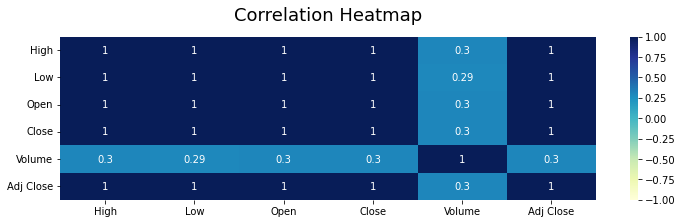

In [14]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(EDPR.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

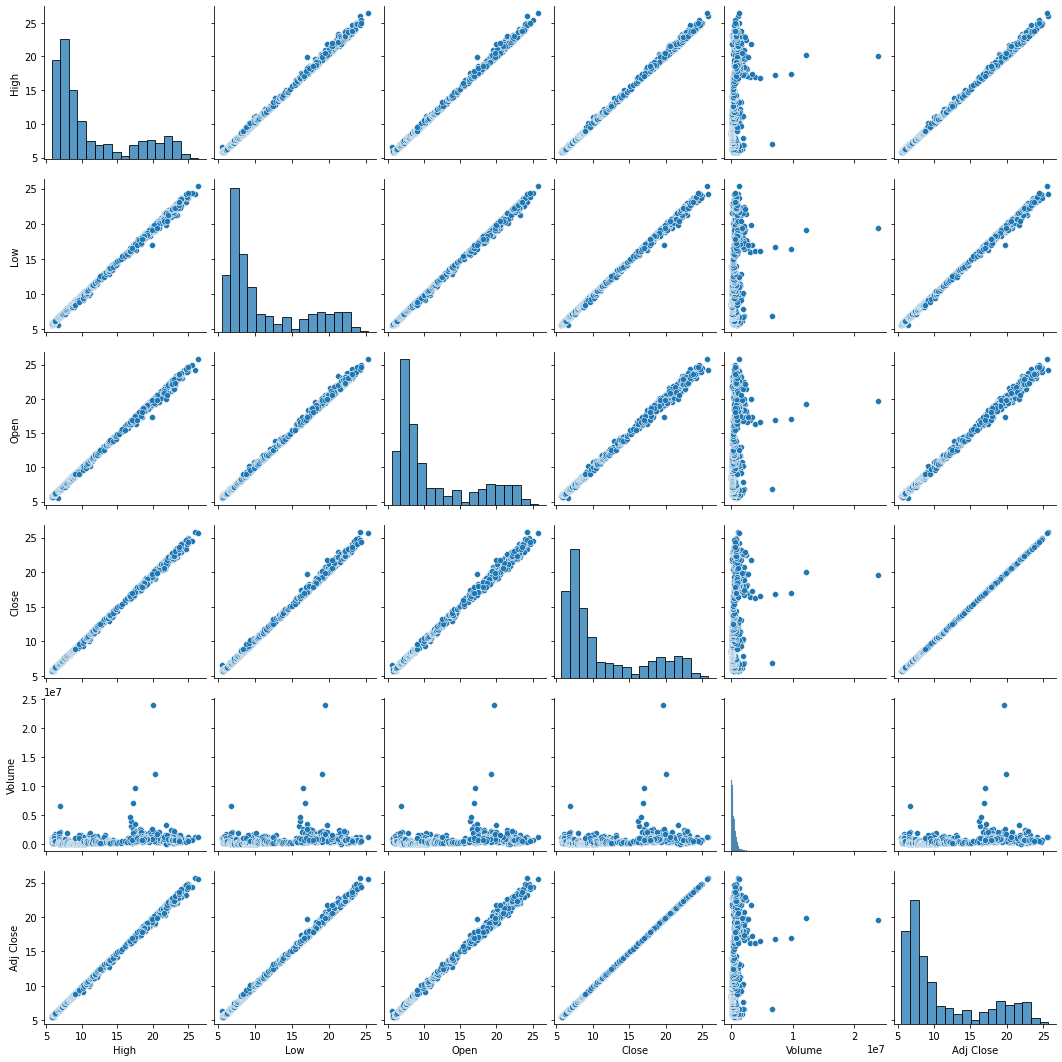

In [15]:
sns.pairplot(EDPR)

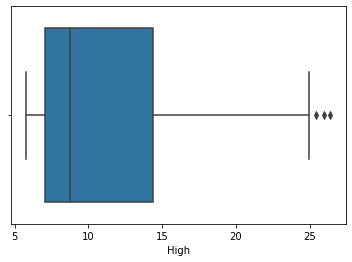

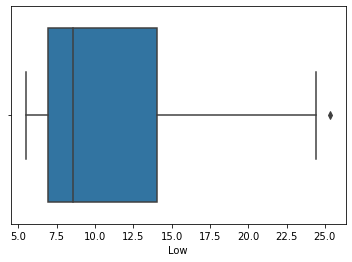

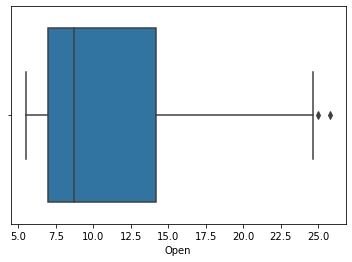

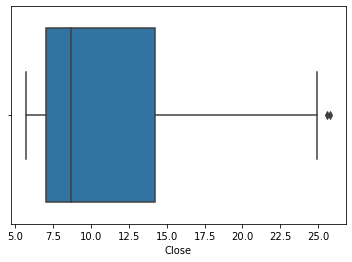

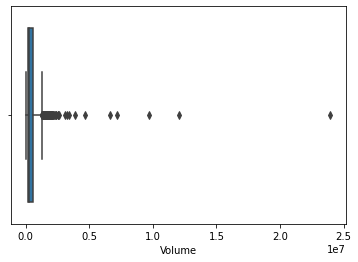

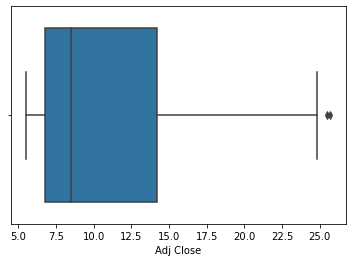

In [16]:
#We select the columns
numerical_EDPR= EDPR.select_dtypes(include=['int64','float64']).columns

warnings.filterwarnings('ignore') # We can suppress the warnings

for col in numerical_EDPR:
    sns.boxplot(EDPR[col])
    plt.show() 


In [17]:
# We selected the main column  for us
close_EDPR= EDPR['Close']

# freq='B' stands for only weekdays
weekdays_EDPR= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need reindex close using all weekdays as the new index.
close_EDPR= close_EDPR.reindex(weekdays_EDPR)

#We filling the Missing values (NaN) with 'forward fill'
close_EDPR = close_EDPR.fillna(method='ffill')
close_EDPR = close_EDPR.dropna()# delete NaNs if there are more.
#we passed the information into Dataframe and rename the columns
close_EDPR = pd.DataFrame(close_EDPR).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_EDPR.head()

Close
2016-01-04  7.267
2016-01-05  7.240
2016-01-06  7.238
2016-01-07  7.233
2016-01-08  7.194

In [18]:
close_EDPR.tail()

Close
2022-03-29  22.379999
2022-03-30  23.040001
2022-03-31  23.340000
2022-04-01  23.400000
2022-04-04  23.670000

In [19]:
close_EDPR.describe()

Close
count  1631.000000
mean     11.213107
std       5.485694
min       5.700000
25%       6.996000
50%       8.690000
75%      14.160000
max      25.799999

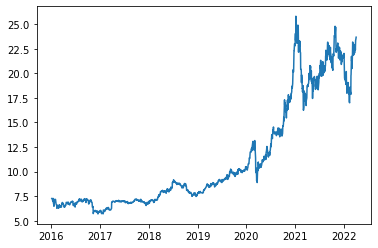

In [20]:
plt.plot(close_EDPR["Close"],label='EDPR Close Price history')

In [21]:
EDPR_df = close_EDPR

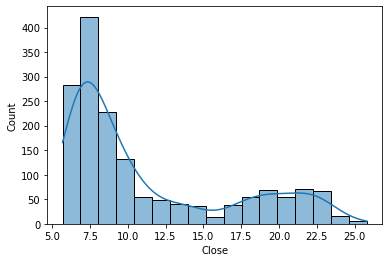

In [22]:
sns.histplot(EDPR_df['Close'], kde=True);

In [23]:
EDPR_df.to_csv("EDPR_df.csv")

#### 1.1.- Data preparation for modeling

In [24]:
EDPR_df= pd.read_csv('EDPR_df.csv')#We decided works with a CSV for modeling 
EDPR_df.head()

Unnamed: 0  Close
0  2016-01-04  7.267
1  2016-01-05  7.240
2  2016-01-06  7.238
3  2016-01-07  7.233
4  2016-01-08  7.194

In [25]:
#Renaming column Unnamed: 0
list(EDPR_df.columns)

EDPR_df = EDPR_df.rename(columns={'Unnamed: 0': 'Date'})

In [26]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1631 non-null   object 
 1   Close   1631 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.6+ KB


In [27]:
EDPR_df= EDPR_df[['Date', 'Close']]

In [28]:
#we define date and we reindex the dataframe
EDPR_df.index = EDPR_df["Date"]

In [29]:
EDPR_df= EDPR_df.sort_index(ascending=True,axis=0)
df_1= pd.DataFrame(index=range(0,len(EDPR_df)),columns=['Date','Close'])
for i in range(0,len(df_1)):
    df_1["Close"][i]=EDPR_df["Close"][i]
    df_1["Date"][i]=EDPR_df['Date'][i]

EDPR_df = df_1
#convert  the Date data to datatime Type
EDPR_df["Date"] = pd.to_datetime(EDPR_df.Date, format="%Y/%m/%d")
EDPR_df.head()

Date  Close
0 2016-01-04  7.267
1 2016-01-05   7.24
2 2016-01-06  7.238
3 2016-01-07  7.233
4 2016-01-08  7.194

In [30]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1631 non-null   datetime64[ns]
 1   Close   1631 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 25.6+ KB


#### 2.- Vestas Wind Systems A/S (VWS.CO)

In [31]:
VWS_T= VWS.describe().transpose()
VWS_T['Bool Mean'] = VWS_T['mean'].gt(VWS_T['50%'])#is the 'mean' greater than the MEDIAN?
#the distribution is positively skewed. 
VWS_T

count          mean           std           min           25%  \
High       1566.0  1.396060e+02  6.054023e+01     73.279999  9.314500e+01   
Low        1566.0  1.353188e+02  5.771551e+01     71.480003  9.087000e+01   
Open       1566.0  1.375561e+02  5.928967e+01     71.580002  9.200500e+01   
Close      1566.0  1.375181e+02  5.921318e+01     72.160004  9.213500e+01   
Volume     1566.0  4.260741e+06  3.017133e+06  48610.000000  2.612944e+06   
Adj Close  1566.0  1.342085e+02  6.083298e+01     68.380997  8.608570e+01   

                    50%           75%           max  Bool Mean  
High       1.135200e+02  1.848500e+02  3.210000e+02       True  
Low        1.110000e+02  1.741250e+02  3.110000e+02       True  
Open       1.124000e+02  1.793125e+02  3.140000e+02       True  
Close      1.123000e+02  1.803000e+02  3.120000e+02       True  
Volume     3.494580e+06  4.928081e+06  4.817422e+07       True  
Adj Close  1.080007e+02  1.803000e+02  3.098979e+02       True

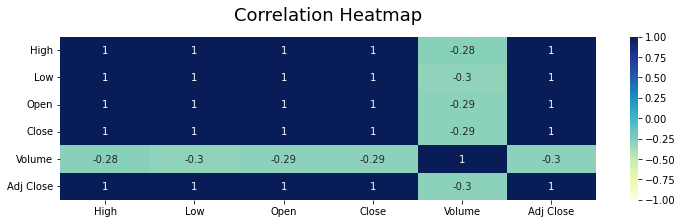

In [32]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(VWS.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

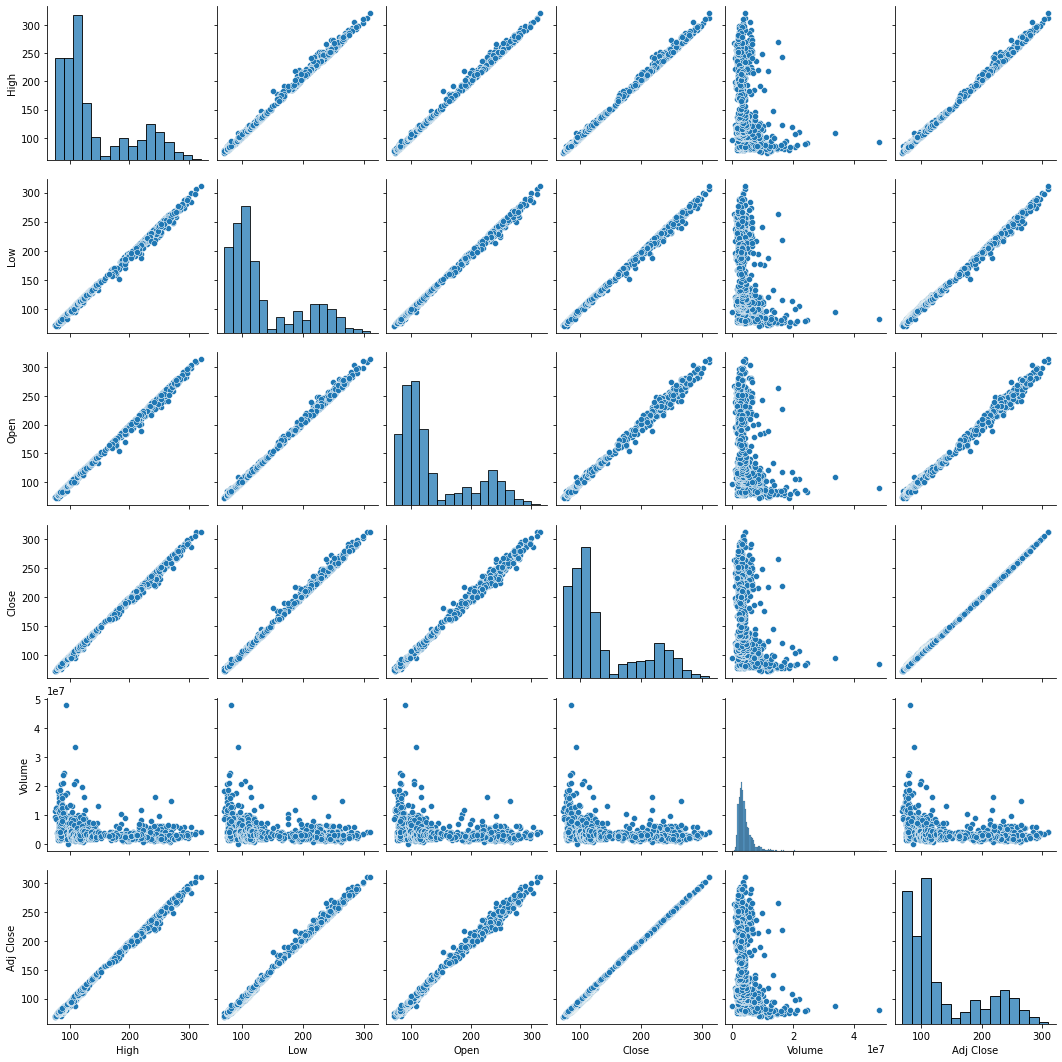

In [33]:
sns.pairplot(VWS)

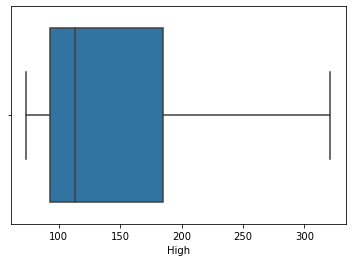

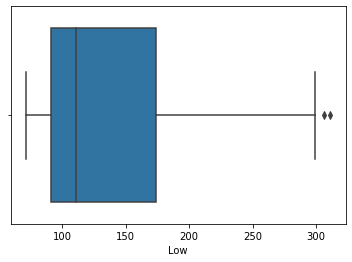

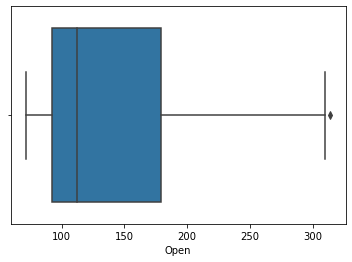

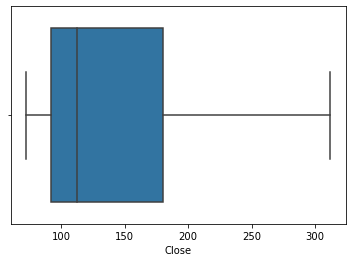

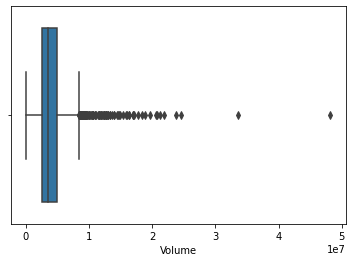

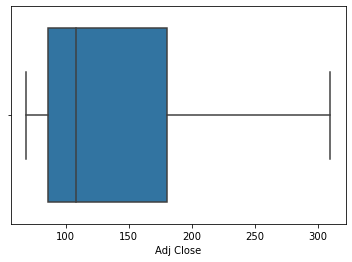

In [34]:
#We select the columns
numerical_VWS= VWS.select_dtypes(include=['int64','float64']).columns

warnings.filterwarnings('ignore') # We can suppress the warnings

for col in numerical_VWS:
    sns.boxplot(VWS[col])
    plt.show() 


In [35]:
# We selected the main column  for us
close_VWS= VWS['Close']

# freq='B' stands for only weekdays
weekdays_VWS= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need to align the existing prices, so we reindex close using all weekdays as the new index.
close_VWS= close_VWS.reindex(weekdays_VWS)

#We filling the Missing values (NaN) with 'forward fill'
close_VWS = close_VWS.fillna(method='ffill')
#we passed the information into Dataframe and rename the columns
close_VWS= pd.DataFrame(close_VWS).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_VWS.head()

Close
2016-01-04  95.040001
2016-01-05  95.040001
2016-01-06  93.940002
2016-01-07  91.860001
2016-01-08  89.800003

In [36]:
close_VWS.tail()

Close
2022-03-29  190.100006
2022-03-30  200.899994
2022-03-31  199.750000
2022-04-01  210.050003
2022-04-04  200.300003

In [37]:
close_VWS.describe()

Close
count  1631.000000
mean    137.446487
std      59.279937
min      72.160004
25%      92.169998
50%     112.400002
75%     175.924995
max     312.000000

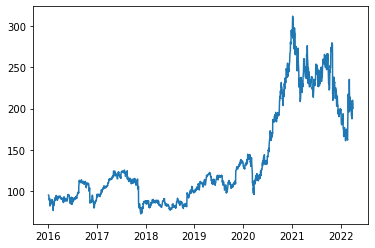

In [38]:
plt.plot(close_VWS["Close"],label='VWS Close Price history')

In [39]:
VWS_df = close_VWS

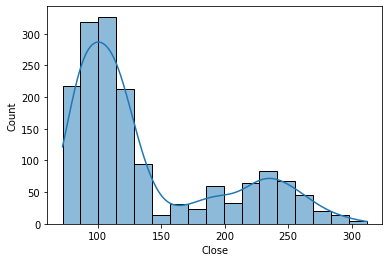

In [40]:
sns.histplot(VWS_df['Close'], kde=True);

In [41]:
VWS_df.to_csv("VWS_df.csv")

#### 2.1.- Data preparation for modeling

In [42]:
VWS_df= pd.read_csv('VWS_df.csv')#We decided works with a CSV for modeling 
VWS_df.head()

Unnamed: 0      Close
0  2016-01-04  95.040001
1  2016-01-05  95.040001
2  2016-01-06  93.940002
3  2016-01-07  91.860001
4  2016-01-08  89.800003

In [43]:
#Renaming column Unnamed: 0
list(VWS_df.columns)

VWS_df = VWS_df.rename(columns={'Unnamed: 0': 'Date'})

In [44]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1631 non-null   object 
 1   Close   1631 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.6+ KB


In [45]:
VWS_df= VWS_df[['Date', 'Close']]

In [46]:

#we define  the dataframe index value as the data column
VWS_df.index = VWS_df["Date"]

In [47]:
VWS_df= VWS_df.sort_index(ascending=True,axis=0)
df_2 = pd.DataFrame(index=range(0,len(VWS_df)),columns=['Date','Close'])
for i in range(0,len(df_2)):
    df_2["Date"][i]=VWS_df['Date'][i]
    df_2["Close"][i]=VWS_df["Close"][i]

VWS_df = df_2
#convert  the Date data to datatime Type
VWS_df["Date"] = pd.to_datetime(VWS_df.Date, format="%Y/%m/%d")
VWS_df.head()

Date      Close
0 2016-01-04  95.040001
1 2016-01-05  95.040001
2 2016-01-06  93.940002
3 2016-01-07  91.860001
4 2016-01-08  89.800003

In [48]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1631 non-null   datetime64[ns]
 1   Close   1631 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 25.6+ KB


In [49]:
VWS_df = VWS_df.rename(columns={'Close': 'VWS'})
Stocks_df = VWS_df

In [50]:
Stocks_df["EDPR"] = EDPR_df["Close"]

In [51]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1631 non-null   datetime64[ns]
 1   VWS     1631 non-null   object        
 2   EDPR    1631 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 38.4+ KB


In [52]:

#we define  the dataframe'd index valu as the data column
Stocks_df.index = Stocks_df["Date"]

In [53]:
Stocks_df= Stocks_df.sort_index(ascending=True,axis=0)
df_3 = pd.DataFrame(index=range(0,len(Stocks_df)),columns=['Date','EDPR', 'VWS'])
for i in range(0,len(df_3)):
    df_3["Date"][i]=Stocks_df['Date'][i]
    df_3["EDPR"][i]=Stocks_df["EDPR"][i]
    df_3["VWS"][i]=Stocks_df["VWS"][i]

Stocks_df = df_3
#convert  the Date data to datatime Type
Stocks_df["Date"] = pd.to_datetime(Stocks_df.Date, format="%Y/%m/%d")
Stocks_df.head()

Date   EDPR        VWS
0 2016-01-04  7.267  95.040001
1 2016-01-05   7.24  95.040001
2 2016-01-06  7.238  93.940002
3 2016-01-07  7.233  91.860001
4 2016-01-08  7.194  89.800003

In [54]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1631 non-null   datetime64[ns]
 1   EDPR    1631 non-null   object        
 2   VWS     1631 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 38.4+ KB


In [55]:
Stocks_df.head()

Date   EDPR        VWS
0 2016-01-04  7.267  95.040001
1 2016-01-05   7.24  95.040001
2 2016-01-06  7.238  93.940002
3 2016-01-07  7.233  91.860001
4 2016-01-08  7.194  89.800003

In [56]:
import plotly.express as px
graphic = px.line(title = 'Stock price history')
for i in Stocks_df.columns[1:]:
  graphic.add_scatter(x = Stocks_df['Date'], y = Stocks_df[i], name = i)
graphic.show()

## Scaling

In [57]:
#Splinting into X/y
X = Stocks_df.drop('Date', axis=1)
y= Stocks_df['Date']
Stocks_normalized = X
Stocks_normalized.head()

EDPR        VWS
0  7.267  95.040001
1   7.24  95.040001
2  7.238  93.940002
3  7.233  91.860001
4  7.194  89.800003

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(Stocks_normalized)
Stocks = scaler.transform(Stocks_normalized)
DF= pd.DataFrame(Stocks)
DF.rename(columns= {0: 'EDPR', 1: 'VWS'}, inplace=True)
X = DF
X['Date'] = y
X.set_index(X.columns[-1], inplace=True)
X.reset_index(inplace=True)
Stock_norm = X

In [59]:
Stock_norm.head()

Date      EDPR       VWS
0 2016-01-04  0.077960  0.095397
1 2016-01-05  0.076617  0.095397
2 2016-01-06  0.076517  0.090811
3 2016-01-07  0.076269  0.082138
4 2016-01-08  0.074328  0.073549

In [60]:
Stock_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1631 non-null   datetime64[ns]
 1   EDPR    1631 non-null   float64       
 2   VWS     1631 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.4 KB


In [61]:
#Visualizing the graphic with the normalized data

graphic_norm = px.line(title = 'Stock price history')
for i in Stock_norm.columns[1:]:
  graphic_norm.add_scatter(x = Stock_norm['Date'], y = Stock_norm[i], name = i)
graphic_norm.show()

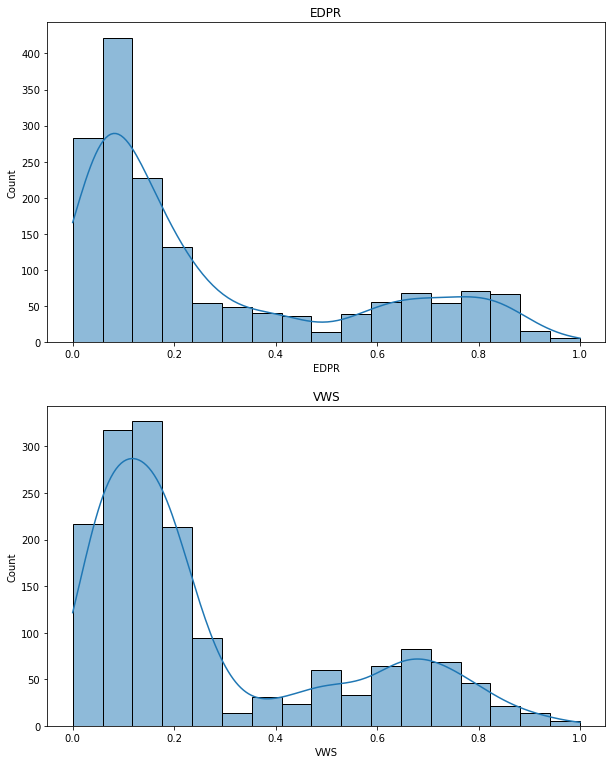

In [62]:
import numpy as np
plt.figure(figsize=(10,20))
i = 1
for i in np.arange(1, len(Stock_norm.columns)):
  plt.subplot(3, 1, i + 1)
  sns.histplot(Stock_norm[Stock_norm.columns[i]], kde = True)
  plt.title(Stock_norm.columns[i])

### III.- ETS-Decomposition


#### 1.- EDP Renováveis (EDPR.LS)

In [63]:
EDPR= pd.read_csv('EDPR.csv',index_col='Date',parse_dates=True)#We use the first CSV that we create for modeling 
#.asfreq(freq='b')
EDPR.head(2)

Unnamed: 0   High    Low   Open  Close    Volume  Adj Close
Date                                                                   
2016-01-04           0  7.267  7.120  7.133  7.267  628745.0   6.967113
2016-01-05           1  7.344  7.192  7.250  7.240  623709.0   6.941227

In [64]:
EDPR.drop(columns=['Unnamed: 0']).dropna().head(2)#cleaning data

High    Low   Open  Close    Volume  Adj Close
Date                                                       
2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.967113
2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.941227

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

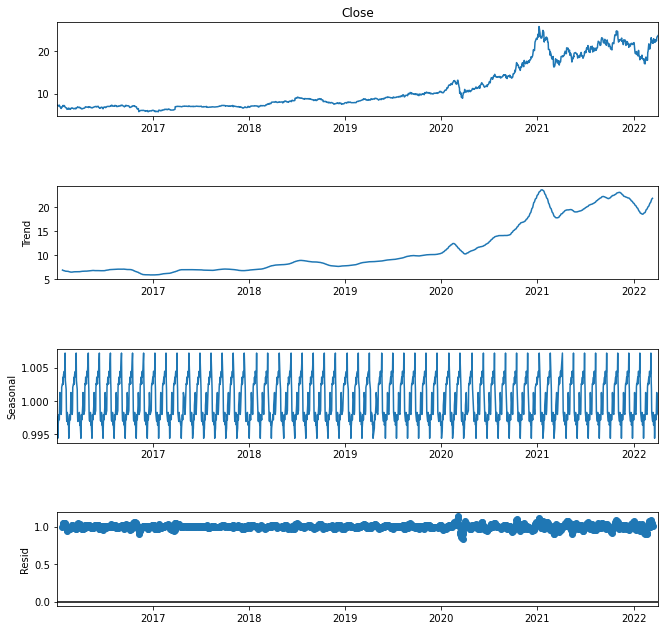

In [66]:
result = seasonal_decompose(EDPR['Close'], model='mul',freq=30)  # model='mul' also works
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 10)

 #### Stationarity

In [67]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
result= adfuller(EDPR['Close'], autolag='AIC')

In [68]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print("Reject the null hypothesis")
    print ("Time Series is Stationary")
    
else:
    print("Fail to reject the null hypothesis")
    print ("Time Series is non-stationary")

ADF Statistic: -0.060607
p-value: 0.953224
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Reject the null hypothesis
Time Series is Stationary


#### 2.- Vestas Wind Systems A/S (VWS.CO)

In [69]:
VWS= pd.read_csv('VWS.csv',parse_dates=True)#We use the first CSV that we create for modeling 
VWS.head(2)

Unnamed: 0        Date       High        Low       Open      Close  \
0           0  2016-01-04  95.959999  94.440002  95.800003  95.040001   
1           1  2016-01-05  95.959999  94.440002  95.800003  95.040001   

      Volume  Adj Close  
0  5363530.0   87.25631  
1    48610.0   87.25631

In [70]:
VWS.drop(columns=['Unnamed: 0']).head(2)#cleaning data

Date       High        Low       Open      Close     Volume  \
0  2016-01-04  95.959999  94.440002  95.800003  95.040001  5363530.0   
1  2016-01-05  95.959999  94.440002  95.800003  95.040001    48610.0   

   Adj Close  
0   87.25631  
1   87.25631

<Figure size 432x288 with 0 Axes>

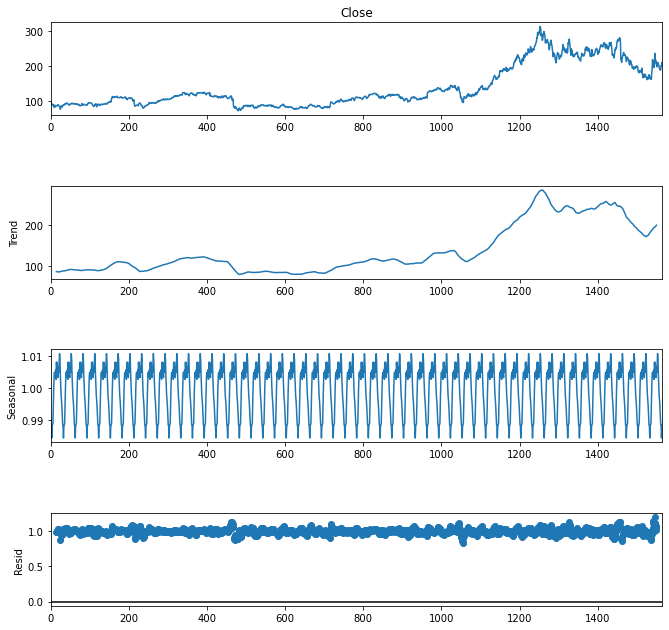

In [71]:
result = seasonal_decompose(VWS['Close'], model='multiplicative',freq=30)  # model='mul' also works
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 10)

#### Stationary or Non -Stationary

In [72]:
# ADF Test
result = adfuller(EDPR['Close'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print("Reject the null hypothesis")
    print ("Time Series is Stationary")
    
else:
    print("Fail to reject the null hypothesis")
    print ("Time Series is non-stationary")

ADF Statistic: -0.060607
p-value: 0.953224
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Reject the null hypothesis
Time Series is Stationary


### IV. Moving Averages

In [73]:
#create moving average by applying a mean function to a rolling window.
EDPR['SMA1M'] = EDPR['Close'].rolling(window=30).mean()

#EDPR.head()

In [74]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
EDPR['EWMA1M'] = EDPR['Close'].ewm(span=30,adjust=False).mean()
#EDPR.head()

In [75]:
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 30
alpha = 2/(span+1)
EDPR['SES1M']=SimpleExpSmoothing(EDPR['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues
EDPR.tail()

Unnamed: 0       High        Low       Open      Close    Volume  \
Date                                                                           
2022-03-29        1598  22.940001  22.240000  22.860001  22.379999  682583.0   
2022-03-30        1599  23.080000  22.240000  22.379999  23.040001  771345.0   
2022-03-31        1600  23.660000  22.620001  23.059999  23.340000  870549.0   
2022-04-01        1601  23.740000  23.160000  23.469999  23.400000  719760.0   
2022-04-04        1602  23.750000  23.080000  23.590000  23.670000  550700.0   

            Adj Close      SMA1M     EWMA1M      SES1M  
Date                                                    
2022-03-29  22.379999  21.151000  21.436351  21.371272  
2022-03-30  23.040001  21.321667  21.539812  21.436351  
2022-03-31  23.340000  21.479333  21.655953  21.539812  
2022-04-01  23.400000  21.646000  21.768472  21.655953  
2022-04-04  23.670000  21.838000  21.891152  21.768472

In [76]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

EDPR['DESadd1M'] = ExponentialSmoothing(EDPR['Close'], trend='add').fit().fittedvalues

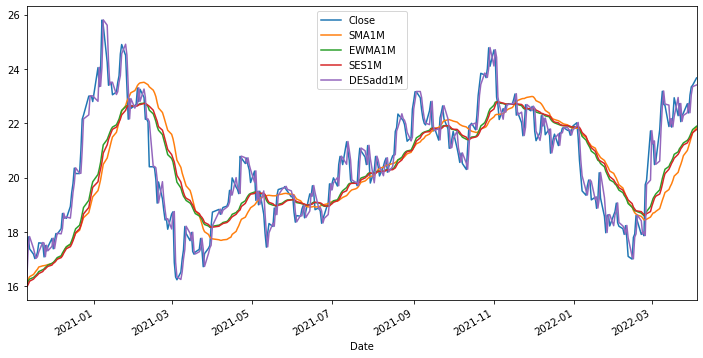

In [77]:
#the last year
EDPR[['Close','SMA1M','EWMA1M','SES1M','DESadd1M']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### V.- Identifying AR and MA orders by ACF and PACF plots

After knowing that the time series is stationary we can plot ACF and PACF in order to identify AR and MA terms in the ARMA model. Plotting them help us to undertand how to choose the best q and p values from them.
In linear regression models performs best when the predictors are not correlated and are independent of each other.

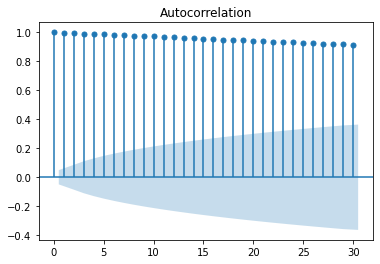

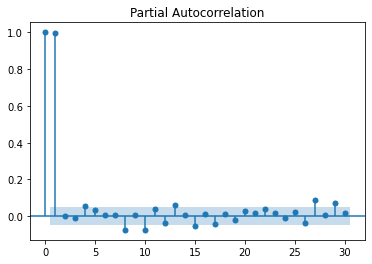

In [78]:
# Calculate the residual by subtracting the average values
EDPR['residual'] = EDPR['Close'] - EDPR['Close'].mean()

# Drop the missing values
EDPR = EDPR.dropna()

# Plot the close price with 50 lag values
plot_acf(EDPR.Close, lags = 30)

# Display partial auto correaltion function
x = plot_pacf(EDPR.Close, lags = 30)

Blue bars on the plots above are the error bands, everything in this area is not statistically significant. 
ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modeling.

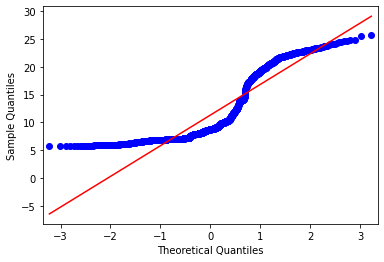

In [79]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
x = sm.qqplot(EDPR['Close'], line = 's')

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.

In [80]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = EDPR['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

Date
2016-02-15    0.099
2016-02-16   -0.032
2016-02-17    0.188
2016-02-18   -0.135
2016-02-19   -0.085
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2016-Dec 2016')

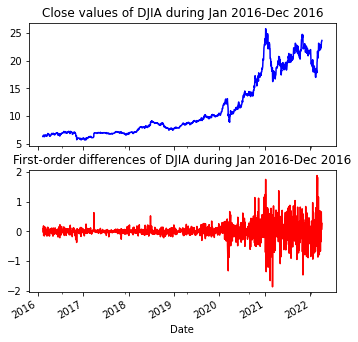

In [81]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
EDPR['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')

ADF Statistic: -7.469997
p-value: 0.000000


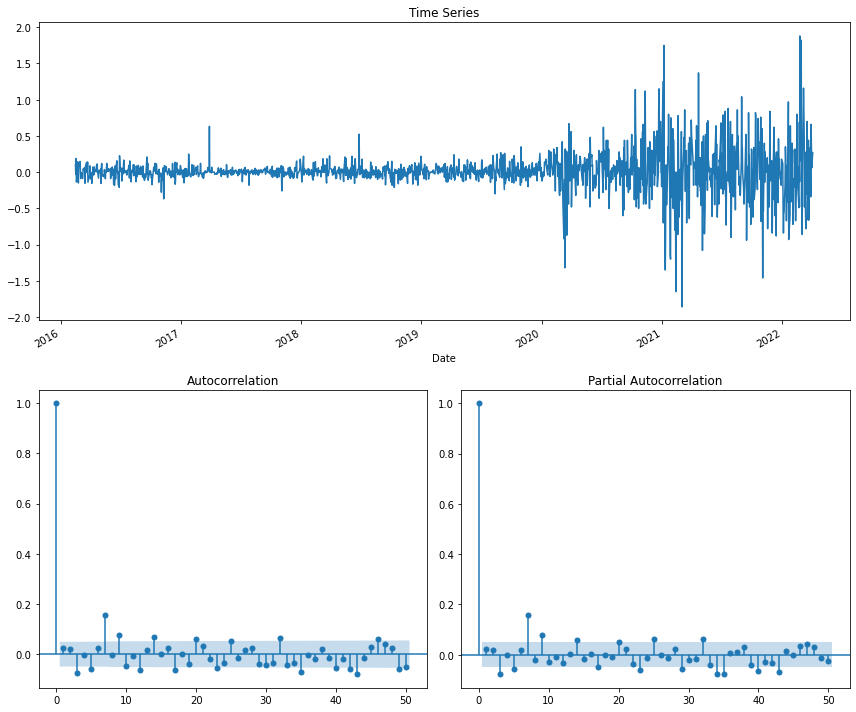

In [82]:
# plot the data with 50 lags
plt.figure(figsize=(12, 10))
layout = (2, 2)
    
ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
ax_acf= plt.subplot2grid(layout, (1, 0))
ax_pacf = plt.subplot2grid(layout, (1, 1))
    
first_order_diff.plot(ax = ax_xt)
ax_xt.set_title('Time Series')
plot_acf(first_order_diff, lags = 50, ax = ax_acf)
plot_pacf(first_order_diff, lags = 50, ax = ax_pacf)
plt.tight_layout()

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [83]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 =EDPR.iloc[:125].Close.mean(), EDPR.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = EDPR.iloc[:125].Close.var(), EDPR.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 6.723696, mean2 = 11.709391
variance1 = 0.046220, variance2 = 31.073930


### VI.-ARMA

q is number of lagged forecast errors that should go into the ARIMA Model.

In [84]:
aicVal=[]

ar =1 #0 , 1 , 2 #p is number of lags of Y to be used as predictors
ma =0 #1 , 0 , 0 #q is number of lagged forecast errors that should go into the ARIMA Model.
#d is the number of differencing required to make the time series stationary
# 1, 0 is the lowest coefficient

arma_obj = smtsa.ARMA(EDPR.Close.tolist(), order=(ar, ma)).fit(maxlag=30, method='mle', trend='nc') 
aicVal.append([ar, ma, arma_obj.aic])
print(aicVal)
# mle: Maximum Likelihood Estimation 
# nc: no constant        

[[1, 0, 397.8677460026356]]


Akaike Information Criteria(AIC) is a  statistical measure to compare different models for their relative quality

In [85]:
arma_obj= smtsa.ARMA(EDPR.Close.tolist(), order = (1, 0)).fit(maxlag = 30, method='mle', trend='nc') 
EDPR['ARMA']=arma_obj.predict()
arma_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1574
Model:                     ARMA(1, 0)   Log Likelihood                -196.934
Method:                           mle   S.D. of innovations              0.274
Date:                Tue, 05 Apr 2022   AIC                            397.868
Time:                        00:21:34   BIC                            408.590
Sample:                             0   HQIC                           401.853
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   5508.646      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Text(0, 0.5, 'Closing price')

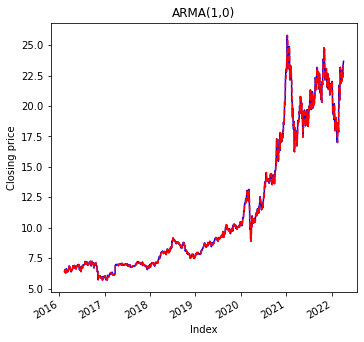

In [86]:
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)
EDPR.Close.iloc[1:].plot(color = 'b', linestyle = '-', ax = axarr)
EDPR['ARMA'].iloc[1:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')

### VII.-ARIMA

In [87]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(EDPR['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)            

[[0, 1, 0, 386.91317980602116], [0, 1, 1, 388.08360654213993], [0, 1, 2, 389.1935969448391], [1, 1, 0, 388.0479414538627], [1, 1, 1, 389.96851608420275], [1, 1, 2, 386.72639860056734], [2, 1, 0, 389.44985925071023], [2, 1, 1, 387.70772671594796], [2, 1, 2, 370.67794252726526], [0, 2, 0, 1439.4815632847258], [0, 2, 1, 395.6458365629869], [0, 2, 2, 396.83025341190205], [1, 2, 0, 993.2997981659864], [1, 2, 1, 396.87287279587554], [1, 2, 2, 399.42041862902806], [2, 2, 0, 879.0350417440404], [2, 2, 1, 398.20788653699583], [2, 2, 2, 396.46656151123034]]


In [88]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(EDPR['Close'].tolist(), order = (0, 2, 1))#smallest number

# d = 2, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit(disp = 0)

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                 1572
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -194.823
Method:                       css-mle   S.D. of innovations              0.273
Date:                Tue, 05 Apr 2022   AIC                            395.646
Time:                        00:21:43   BIC                            411.726
Sample:                             2   HQIC                           401.622
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.786e-05   1.52e-05      1.177      0.239   -1.19e-05    4.76e-05
ma.L1.D2.y    -1.0000      0.002   -597.006      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [89]:
# Declare the array 'pred' and append the values 
pred = np.append([0, 0], arima_obj_fit.fittedvalues.tolist())

# Add a new column 'ARIMA' into dataframe
EDPR['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = np.append([0, 0], arima_obj_fit.resid + arima_obj_fit.fittedvalues)

# Add a column 'diffval' into dataframe
EDPR['diffval'] = diffval

#drop
EDPR.drop(columns=['Unnamed: 0'])
# Display first five records
EDPR.tail()

Unnamed: 0       High        Low       Open      Close    Volume  \
Date                                                                           
2022-03-29        1598  22.940001  22.240000  22.860001  22.379999  682583.0   
2022-03-30        1599  23.080000  22.240000  22.379999  23.040001  771345.0   
2022-03-31        1600  23.660000  22.620001  23.059999  23.340000  870549.0   
2022-04-01        1601  23.740000  23.160000  23.469999  23.400000  719760.0   
2022-04-04        1602  23.750000  23.080000  23.590000  23.670000  550700.0   

            Adj Close      SMA1M     EWMA1M      SES1M   DESadd1M   residual  \
Date                                                                           
2022-03-29  22.379999  21.151000  21.436351  21.371272  22.730239  11.145748   
2022-03-30  23.040001  21.321667  21.539812  21.436351  22.390239  11.805750   
2022-03-31  23.340000  21.479333  21.655953  21.539812  23.050241  12.105749   
2022-04-01  23.400000  21.646000  21.768472  21.655953  23.350240  12.165749   
2022-04-04  23.670000  21.838000  21.891152  21.768472  23.410240  12.435749   

                 ARMA     ARIMA   diffval  
Date                                       
2022-03-29  22.716910 -0.315531 -0.680000  
2022-03-30  22.376956  0.364254  1.000002  
2022-03-31  23.036868 -0.635324 -0.360003  
2022-04-01  23.336827 -0.275129 -0.240000  
2022-04-04  23.396818 -0.035089  0.210001

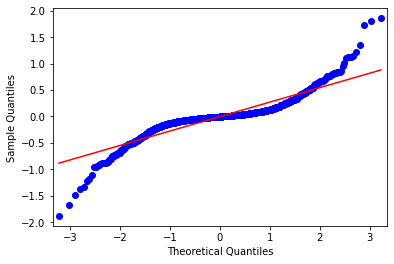

In [90]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

Text(0, 0.5, 'Closing')

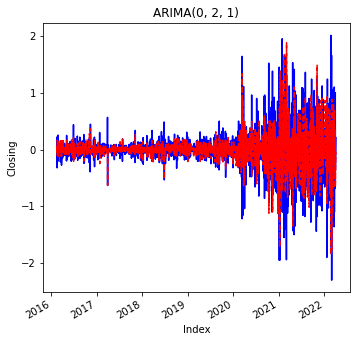

In [91]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
EDPR['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
EDPR['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

Text(0, 0.5, 'Forecasted value')

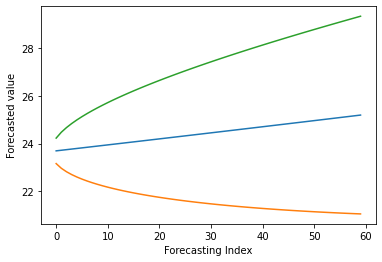

In [92]:
f, err, ci = arima_obj_fit.forecast(60)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure

### VII.-SARIMA

In [98]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# seasonal_order = (2, 1, 2, 12) means
# 12 additional parameter means number of observations per year or the period
best_model = SARIMAX(EDPR['Close'], order = (2, 1, 2), seasonal_order = (2, 1, 2, 12)).fit(dis = -1)

# Display the summary of the model
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1574
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -215.048
Date:                            Tue, 05 Apr 2022   AIC                            448.096
Time:                                    00:46:44   BIC                            496.274
Sample:                                         0   HQIC                           466.009
                                           - 1574                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7696      0.934      0.824      0.410      -1.061       2.601
ar.L2          0.1240      0.776   

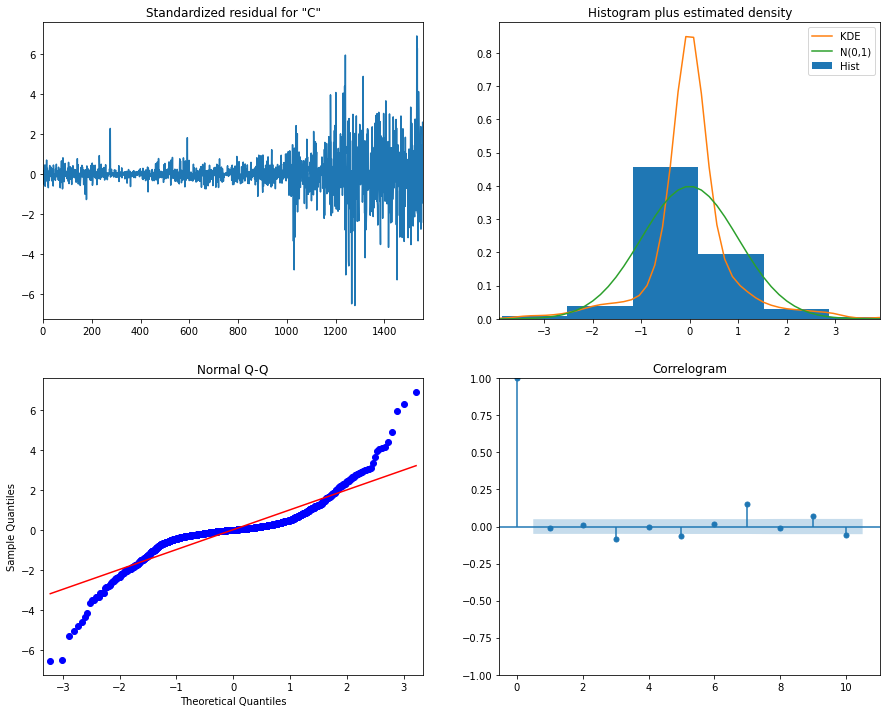

In [100]:
# Diagnosing the model residuals
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

## Complementary Reading

Reference: Efstathopoulos g. (2020) Python for Finance, Part I: Yahoo & Google Finance API, pandas, and matplotlib 
Available at: URL <a href="https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ ">https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ </a>(Accessed 14 October 2021).  

Reference: Witham, J. (2020) The Imperative For A 24/7 Renewable Energy World, Forbes. 
Available at: URL <a href="https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo">https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo/ </a>(Accessed 14 October 2021).  

Reference: Norris, E. (2021) "Why Did My Stock's Ticker Change?", Investopedia. 
Available at: URL <a href="https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/">https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/ </a>(Accessed 14 October 2021).  

Reference: Mahgoub, A. (2021) "Stock Prediction using Regression Algorithm in Python", Medium. 
Available at: URL <a href="https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9/">https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9</a>(Accessed 25 Feb 2022). 

Reference: Prabhakaran, S. (2019) "Augmented Dickey Fuller Test (ADF Test) – Must Read Guide", Medium. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.">https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.</a>

Reference: Masum, M. (2020) "Time Series Analysis: Identifying AR and MA using ACF and PACF Plots", Medium. 
Available at: URL <a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8</a> (Accessed 21 March 2022).  

Reference: Zvornicanin E. (2021) "Choosing the best q and p from ACF and PACF plots in ARMA-type modeling", Baeldung. 
Available at: URL <a href="https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling">https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling</a> (Accessed 21 March 2022). 


Reference: Prabhakaran S. (2021) "ARIMA Model – Complete Guide to Time Series Forecasting in Python", Machinelearningplus. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/">https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/</a> (Accessed 21 March 2022). 

